[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]


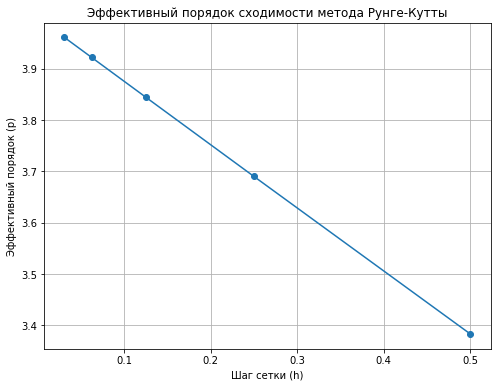

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4(f, u0, t_span, n):
    """Решает ОДУ методом Рунге-Кутты 4-го порядка."""
    t0, tf = t_span
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n + 1)
    u = u0.copy()
    result = np.zeros(len(t)) # Одномерный массив для скалярной задачи
    result[0] = u0

    for i in range(n):
        k1 = f(t[i], u)
        k2 = f(t[i] + h/2, u + h/2 * k1)
        k3 = f(t[i] + h/2, u + h/2 * k2)
        k4 = f(t[i] + h, u + h * k3)
        u = u + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        result[i+1] = u

    return t, result

def myfun(t, u):
    return u + t*2 + 1

t_span = (0, 1)
u0 = np.array([0.5]) # Начальное условие как массив
num_calculations = 7
r = 2 # Коэффициент изменения шага сетки

h_values = []
u_values = []

for i in range(num_calculations):
    n = 2**i
    t, u = runge_kutta_4(myfun, u0, t_span, n)
    h_values.append((t_span[1] - t_span[0]) / n)
    u_values.append(u[-1])

# Расчет эффективного порядка
effective_order = []
for i in range(1, num_calculations - 1): # Начинаем с 1, чтобы иметь u_h, u_rh, u_r^2h
    u_h = u_values[i-1]
    u_rh = u_values[i]
    u_r2h = u_values[i+1]
    
    if abs(u_rh - u_h) > 1e-15: # Избегаем деления на ноль или очень маленькое число
        p = abs(np.log(abs((u_r2h - u_rh) / (u_rh - u_h))) / np.log(r)) # Используем abs для устойчивости
        effective_order.append(p)
    else: 
        effective_order.append(np.nan)
print(h_values)
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(h_values[1:6], effective_order, marker='o', linestyle='-') # h_values[1:-1] соответствует effective_order
plt.xlabel('Шаг сетки (h)')
plt.ylabel('Эффективный порядок (p)')
plt.title('Эффективный порядок сходимости метода Рунге-Кутты')
plt.grid(True)
plt.show()

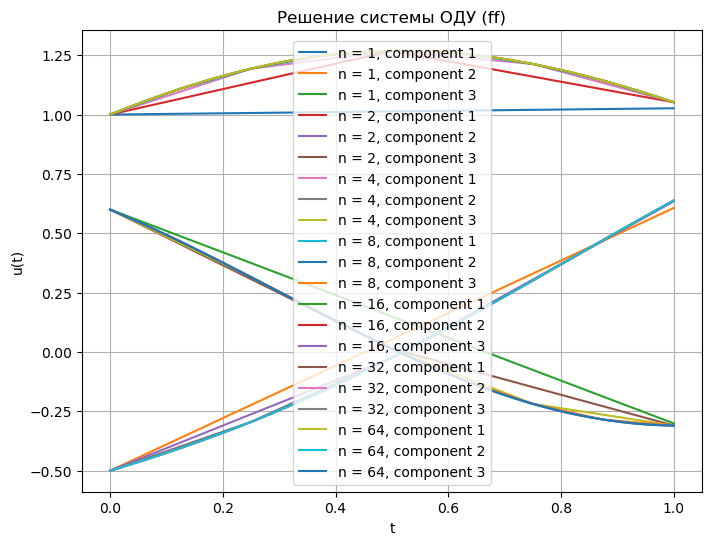

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4(f, u0, t_span, n):
    t0, tf = t_span
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n + 1)
    u = u0.copy()
    result = np.zeros((len(t), len(u0)))
    result[0] = u0

    for i in range(n):
        k1 = f(t[i], u)
        k2 = f(t[i] + h/2, u + h/2 * k1)
        k3 = f(t[i] + h/2, u + h/2 * k2)
        k4 = f(t[i] + h, u + h * k3)
        u = u + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        result[i+1] = u

    return t, result

def ff(t, u):
    om = np.array([np.sin(t), np.cos(t), np.sin(t + np.pi/4)])
    Omega = np.array([[0, -om[2], om[1]],
                     [om[2], 0, -om[0]],
                     [-om[1], om[0], 0]])
    return Omega@u

u0 = np.array([1.0, -0.5, 0.6])
t_span = (0, 1)
num_calculations = 7

plt.figure(figsize=(8, 6))

for i in range(num_calculations):
    n = 2**i
    t, u = runge_kutta_4(ff, u0, t_span, n)
    for j in range(3):
        plt.plot(t, u[:, j], label=f'n = {n}, component {j+1}')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Решение системы ОДУ (ff)')
plt.legend()
plt.grid(True)
plt.show()

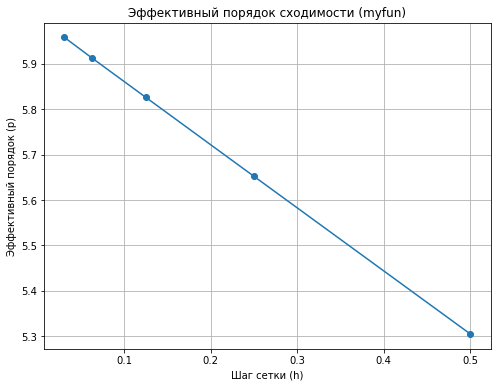

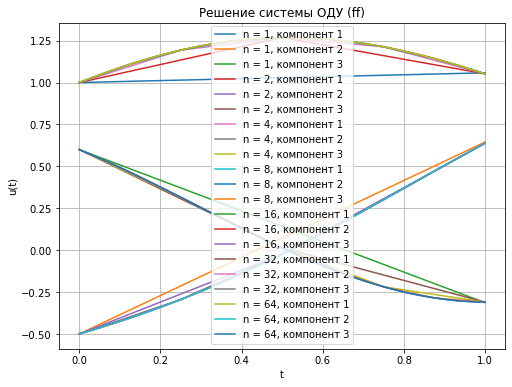

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_general(f, u0, t_span, n, butcher, a, b):
    """Решает ОДУ методом Рунге-Кутты общего вида."""
    t0, tf = t_span
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n + 1)
    u = u0.copy()
    s = len(a)

    result = np.zeros((len(t), len(u0)))
    result[0] = u0

    for i in range(n):
        k = np.zeros((s,) + u.shape)
        for j in range(s):
            temp_u = u.copy()
            for l in range(j):
                temp_u += h * butcher[j, l] * k[l]
            k[j] = f(t[i] + a[j] * h, temp_u)

        u += h * np.sum(b[:, np.newaxis] * k, axis=0)
        result[i + 1] = u

    return t, result

# 7-стадийная схема Хаммуда 6-го порядка
sqrt5 = np.sqrt(5)
butcher = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [4/7, 0, 0, 0, 0, 0, 0],
    [115/112, -5/16, 0, 0, 0, 0, 0],
    [589/630, 5/18, -16/45, 0, 0, 0, 0],
    [229/1200 - 29/6000 * sqrt5, 119/240 - 187/1200 * sqrt5, -14/75 + 34/375 * sqrt5, -3/100 * sqrt5, 0, 0, 0],
    [71/2400 - 587/12000 * sqrt5, 187/480 - 391/2400 * sqrt5, -38/75 + 26/375 * sqrt5, 27/80 - 3/400 * sqrt5, (1 + sqrt5)/4, 0, 0],
    [-49/480 + 43/160 * sqrt5, -425/96 + 51/32 * sqrt5, 52/15 - 4/5 * sqrt5, -27/16 + 3/16 * sqrt5, 5/4 - 3/4 * sqrt5, 5/2 - 0.5 * sqrt5, 0]
])
a = np.array([0, 4/7, 5/7, 6/7, (5 - sqrt5) / 10, (5 + sqrt5) / 10, 1])
b = np.array([1/12, 0, 0, 0, 5/12, 5/12, 1/12])


# Тестовые функции
def myfun(t, u):
    return u + t*2 + 1

def ff(t, u):
    om = np.array([np.sin(t), np.cos(t), np.sin(t + np.pi/4)])
    Omega = np.array([[0, -om[2], om[1]], [om[2], 0, -om[0]], [-om[1], om[0], 0]])
    return Omega @ u

# Настройки
t_span = (0, 1)
num_calculations = 7
r = 2

# Функция a)
u0_a = np.array([0.5])
h_values_a = []
u_values_a = []
for i in range(num_calculations):
    n = 2**i
    t, u = runge_kutta_general(myfun, u0_a, t_span, n, butcher, a, b)
    h_values_a.append((t_span[1] - t_span[0]) / n)
    u_values_a.append(u[-1])

effective_order_a = []
for i in range(1, num_calculations - 1):
    u_h = u_values_a[i-1]
    u_rh = u_values_a[i]
    u_r2h = u_values_a[i+1]
    if abs(u_rh - u_h) > 1e-15:
        p = abs(np.log(abs((u_r2h - u_rh) / (u_rh - u_h))) / np.log(r))
        effective_order_a.append(p)
    else:
        effective_order_a.append(np.nan)

plt.figure(figsize=(8, 6))
plt.plot(h_values_a[1:-1], effective_order_a, marker='o', linestyle='-')
plt.xlabel('Шаг сетки (h)')
plt.ylabel('Эффективный порядок (p)')
plt.title('Эффективный порядок сходимости (myfun)')
plt.grid(True)
plt.show()


# Функция b)
u0_b = np.array([1.0, -0.5, 0.6])
plt.figure(figsize=(8, 6))
for i in range(num_calculations):
    n = 2**i
    t, u = runge_kutta_general(ff, u0_b, t_span, n, butcher, a, b)
    for j in range(3):
        plt.plot(t, u[:, j], label=f'n = {n}, компонент {j+1}')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Решение системы ОДУ (ff)')
plt.legend()
plt.grid(True)
plt.show()

